# Reading dataset

In [3]:
import pandas as pd

data = pd.read_csv(r"C:\Users\ankit\Downloads\4. concrete project/concrete_data.csv")
data


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [7]:
data.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [8]:
data.rename(columns={'fine_aggregate ': 'fine_aggregate'}, inplace=True)

In [9]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365,52.91
1,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
2,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28,74.50
3,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
4,145.0,0.0,179.0,202.0,8.0,824.0,869.0,28,10.54


# Statistical & Multivariate Analysis

## Statistics Table

In [10]:
attrs = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
         'coarse_aggregate', 'fine_aggregate', 'age', 'concrete_compressive_strength']

round(data[attrs].describe(), 2)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00
mean,281.17,73.90,54.19,181.57,6.20,972.92,773.58,45.66,35.82
std,104.51,86.28,64.00,21.35,5.97,77.75,80.18,63.17,16.71
min,102.00,0.00,0.00,121.80,0.00,801.00,594.00,1.00,2.33
25%,192.38,0.00,0.00,164.90,0.00,932.00,730.95,7.00,23.71
50%,272.90,22.00,0.00,185.00,6.40,968.00,779.50,28.00,34.44
75%,350.00,142.95,118.30,192.00,10.20,1029.40,824.00,56.00,46.14
max,540.00,359.40,200.10,247.00,32.20,1145.00,992.60,365.00,82.60


## Data Distribution histograms

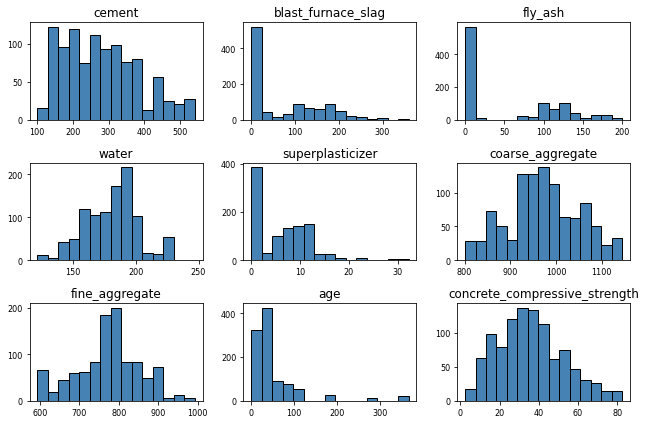

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

data.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.5, 1.5)) 

## Correlation Heatmap

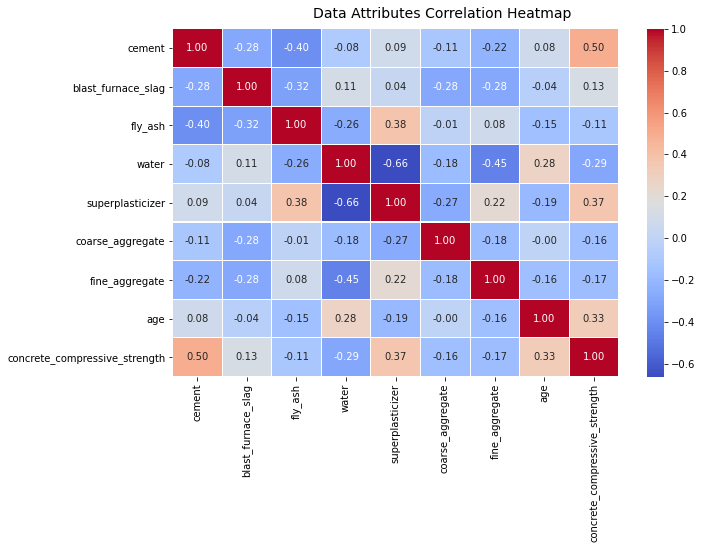

In [12]:
import seaborn as sn

f, ax = plt.subplots(figsize=(10, 6))
corr = data.corr()
hm = sn.heatmap(round(corr, 2), annot=True, ax=ax, cmap='coolwarm', fmt='.2f', linewidths=.05)

f.suptitle('Data Attributes Correlation Heatmap', fontsize=14)
f.subplots_adjust(top=0.93)

## Pairwise Plots

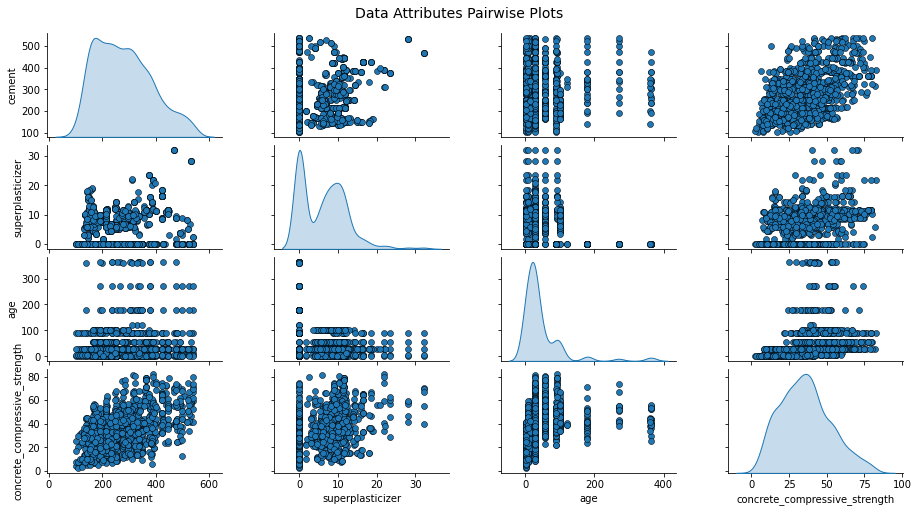

In [13]:
cols = ['cement', 'superplasticizer', 'age', 'concrete_compressive_strength']
pp = sn.pairplot(data[cols], height=1.8, aspect=1.8, 
                plot_kws={'edgecolor': 'k', 'linewidth': 0.5},
                diag_kind='kde', diag_kws={'shade': True})

fig = pp.fig
fig.suptitle('Data Attributes Pairwise Plots', fontsize=14)
fig.subplots_adjust(top=0.93, wspace=0.3)

# Modelling
## Data preparation

In [14]:
import numpy as np

from sklearn.model_selection import train_test_split

x = data[attrs[0:-1]].to_numpy()
y = data[attrs[-1]].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

## Training

### Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)

### Deep Neural Network

In [17]:
from tensorflow import keras
from tensorflow.keras.layers.experimental import preprocessing

normalizer = preprocessing.Normalization()
normalizer.adapt(x)

dnn = keras.models.Sequential([
    normalizer,
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])
dnn.compile(loss='mean_absolute_error', optimizer=keras.optimizers.Adam(0.001))
dnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 8)                 17        
_________________________________________________________________
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,818
Trainable params: 4,801
Non-trainable params: 17
_________________________________________________________________


## Evaluation

### R-squared scores

In [30]:
round(reg.score(x_test, y_test), 3)

0.592

In [32]:
from sklearn.metrics import r2_score

dnn_predicted = dnn.predict(x_test).flatten()
round(r2_score(y_test, dnn_predicted), 3)

0.877

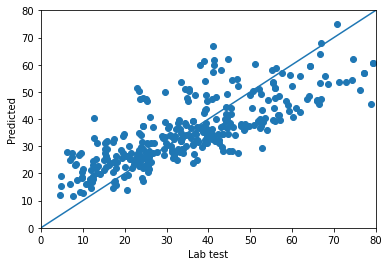

In [33]:
plot_expected_predicted(expected, reg_predicted)

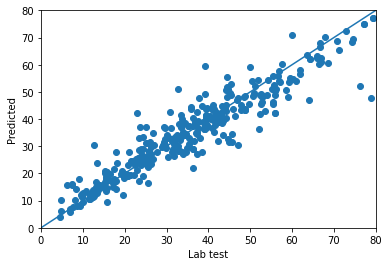

In [35]:
plot_expected_predicted(expected, dnn_predicted)